In [3]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath("../Instruments"))
import numpy as np
from ETF import ETF
from Future import Future
from Treasury import Treasury
from Portfolio import Portfolio
from risk_free_rate import get_risk_free_rate

# Future Only Portfolio

In [4]:
ES1 = Future("ES1")
DX1 = Future("DX1")
FF1 = Future("FF1")
SI1 = Future("SI1")
CL1 = Future("CL1")
NG1 = Future("NG1")
GC1 = Future("GC1")
FF4 = Future("FF4")
DBC = ETF("DBC")

all_futures = [ES1, DX1, FF1, SI1, CL1, NG1, GC1]


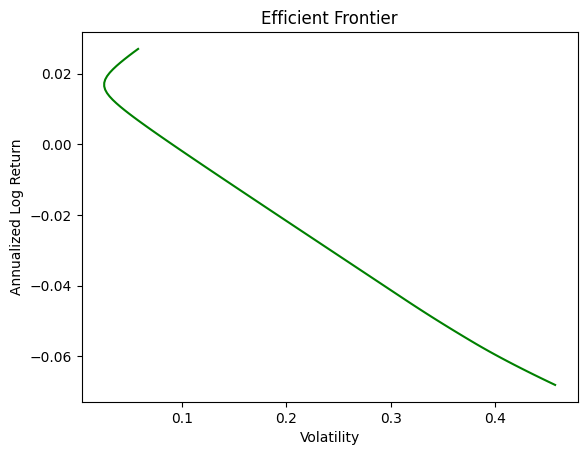

In [5]:
portfolio = Portfolio(all_futures, rf = get_risk_free_rate('2008-05-06'), future_benchmark = DBC)
portfolio.filter(startDate="2008-01-01", endDate="2024-01-01", period=1)
max_sharpe_ratio, ret, vol, weights = portfolio.max_sharpe_portfolio(n_points=100)
portfolio.plot_ef(n_points = 100)


In [6]:
print("MSR portfolio weights: " + str(weights))
print("MSR portfolio expected annualized log return: " + str(ret))
print("MSR portfolio annualized volatility of log returns: " + str(vol))
print("Sharpe Ratio of Portfolio: "+str(max_sharpe_ratio))
print("MSR portfolio VaR: "+str(portfolio.portfolio_VaR(weights)))
print("MSR portfolio ES: "+str(portfolio.portfolio_ES(weights)))
print()

MSR portfolio weights: [-0.00488501  0.5         0.5        -0.00144997 -0.06473018 -0.0044873
  0.07555245]
MSR portfolio expected annualized log return: 0.027028676617670288
MSR portfolio annualized volatility of log returns: 0.05781606499843115
Sharpe Ratio of Portfolio: 0.16572838387063504
MSR portfolio VaR: 0.09509896420873154
MSR portfolio ES: 0.11925793775194572



In [7]:
# Filters data to only 2020 election cycle
portfolio.filter(startDate="2020-01-01", endDate="2021-01-01", period=1)
portfolio.set_rf(get_risk_free_rate('2020-05-05'))
# See how the calculated weights using data up to 2016 election would have worked
# for the 2020 election
print("2020 election period actual annualized log returns: " + str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2019 (6.5 month period of a non-election year)
portfolio.filter(startDate="2019-05-05", endDate="2019-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2019-05-06'))
print("2019 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

# Filters data to May 5 to November 17 of 2018 (6.5 month period of a non-election year)
portfolio.filter(startDate="2018-05-05", endDate="2018-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2018-05-07'))
print("2018 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))


# Filters data to May 5 to November 17 of 2017 (6.5 month period of a non-election year)
portfolio.filter(startDate="2017-05-05", endDate="2017-11-17", period=-1)
portfolio.set_rf(get_risk_free_rate('2017-05-05'))
print("2017 May 5 to November 17 actual annualized log returns: " +  str(portfolio.historical_annualized_log_return(weights)))

2020 election period actual annualized log returns: -0.14524007657186638
2019 May 5 to November 17 actual annualized log returns: 0.03976558982875569
2018 May 5 to November 17 actual annualized log returns: 0.04434908355406289
2017 May 5 to November 17 actual annualized log returns: -0.06938135335059237
